In [1]:
import torch
from torch.autograd import Variable

import torch.nn as nn
import torch.nn.functional as F

import numpy as np
import matplotlib.pyplot as plt

In [2]:
torch.manual_seed(4)

In [9]:
# Test activate function with plt
x = torch.linspace(-5, 5, 200)
x = Variable(x)
x_np = x.data.numpy()

y_relu = F.relu(x).data.numpy()
y_sigmoid = F.sigmoid(x).data.numpy()
y_tanh = F.tanh(x).data.numpy()
y_softplus = F.softplus(x).data.numpy()

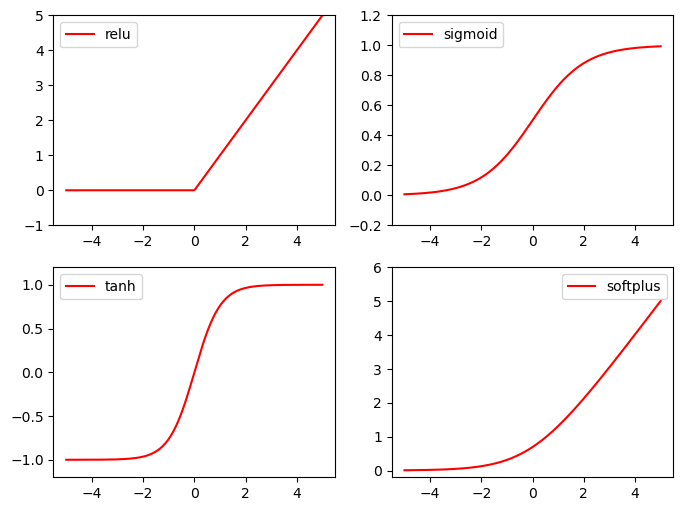

In [10]:
plt.figure(1, figsize=(8,6))

plt.subplot(221)
plt.plot(x_np, y_relu, c='red', label='relu')
plt.ylim((-1,5))
plt.legend(loc='best')

plt.subplot(222)
plt.plot(x_np, y_sigmoid, c='red', label='sigmoid')
plt.ylim((-0.2, 1.2))
plt.legend(loc='best')

plt.subplot(223)
plt.plot(x_np, y_tanh, c='red', label='tanh')
plt.ylim((-1.2, 1.2))
plt.legend(loc='best')

plt.subplot(224)
plt.plot(x_np, y_softplus, c='red', label='softplus')
plt.ylim((-0.2, 6))
plt.legend(loc='best')
plt.show()

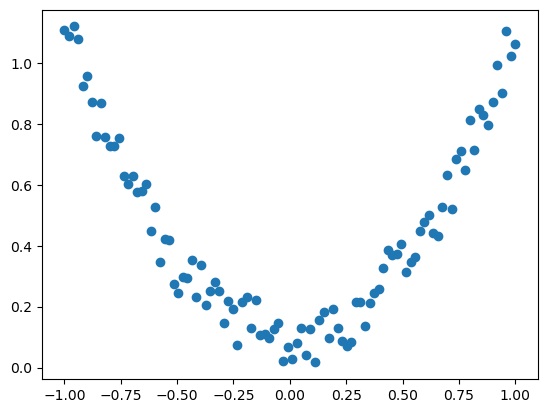

In [17]:
# Make data
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)
y = x.pow(2) + 0.2*torch.rand(x.size())
x, y = Variable(x), Variable(y)

plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()

In [11]:
# Define nonlinear model
# nonlinear model 指的是在线性层之间加入一个 nonlinear 的激活函数，下列代码使用就是 ReLU，其他的还有 nn.Sigmoid, nn.Tanh 等。
hidden = nn.Linear(1, 20, bias=True)
activation = nn.ReLU()
#activation = nn.Sigmoid()
output = nn.Linear(20, 1, bias=True)


# Sequential 定义顺序型网络结构，只能顺序处理它的模块，无需自定义 forward 方法，
# 如果网络结构是复杂的非顺序型的，需要使用 nn.Module 来自定义 forward 逻辑。
net = nn.Sequential(hidden, activation, output)

In [12]:
# Define Optimizer and Loss function
#optimizer = torch.optim.SGD(net.parameters(), lr=0.1)
optimizer = torch.optim.Adam(net.parameters(), lr=0.1)
loss_func = torch.nn.MSELoss()

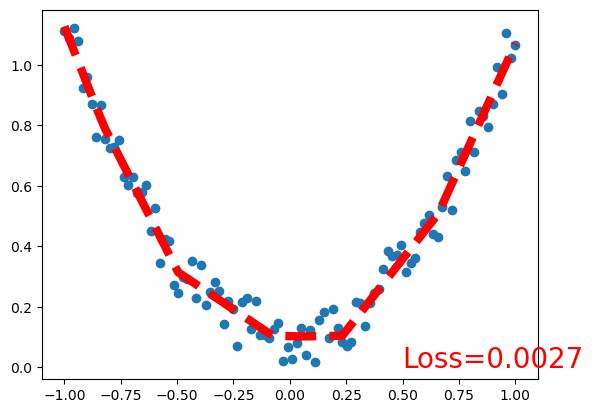

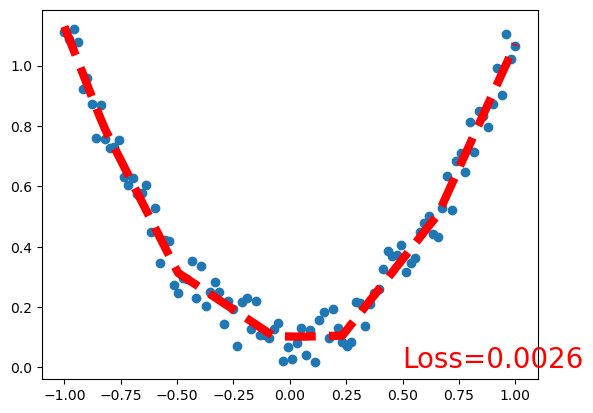

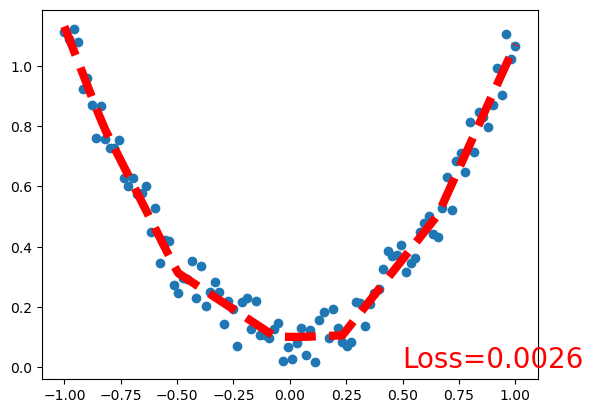

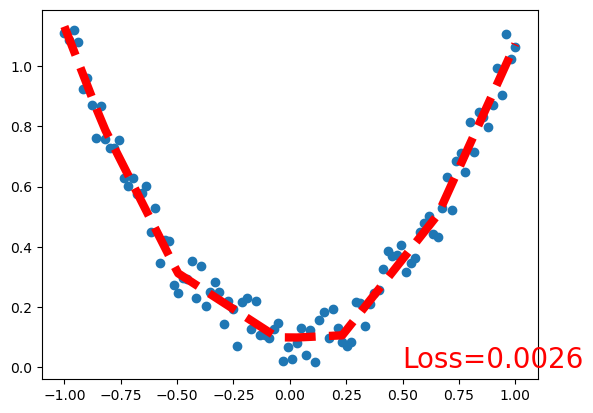

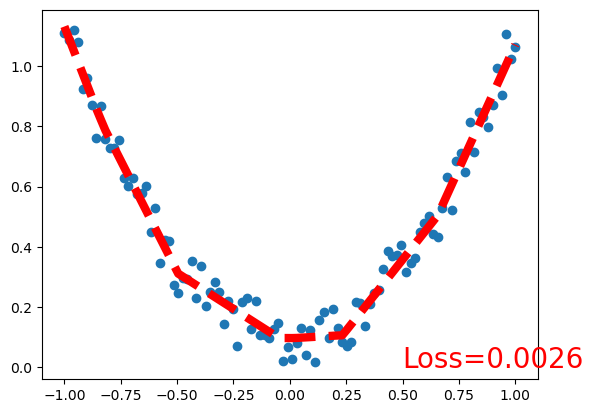

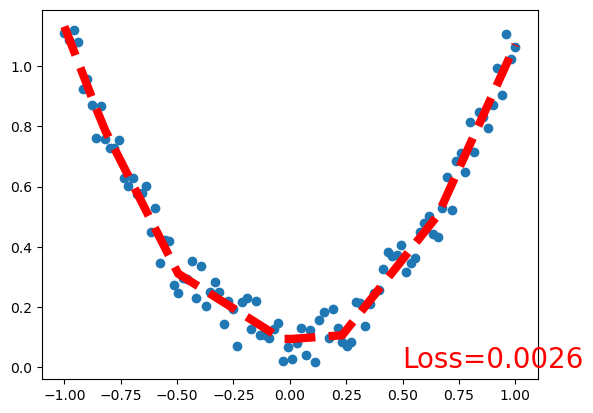

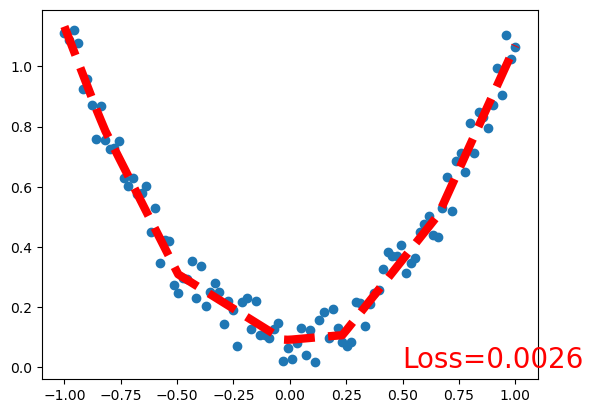

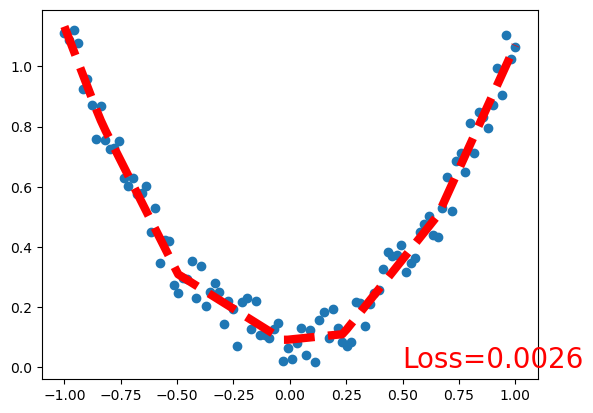

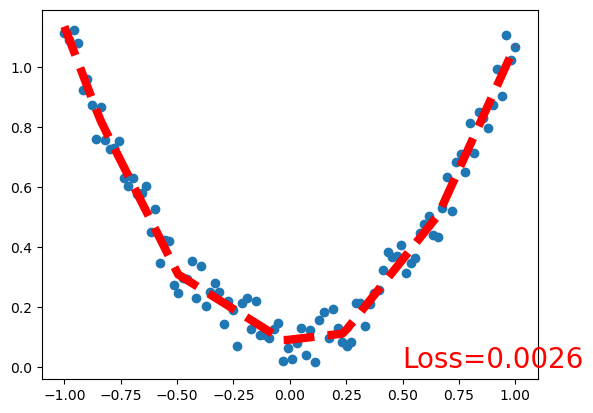

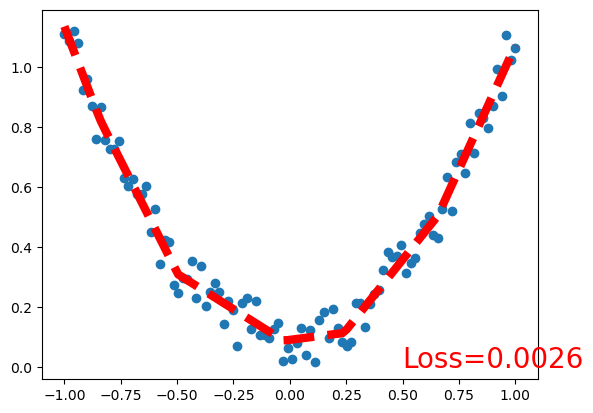

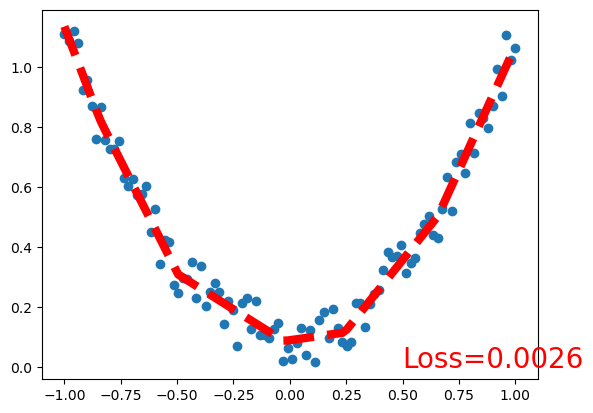

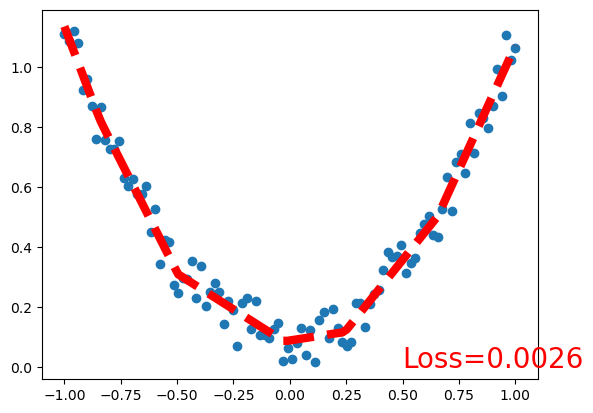

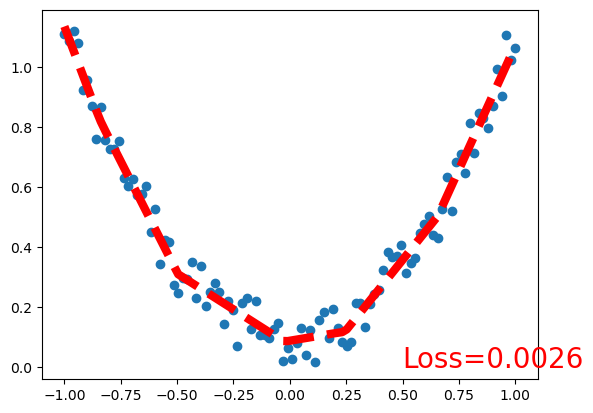

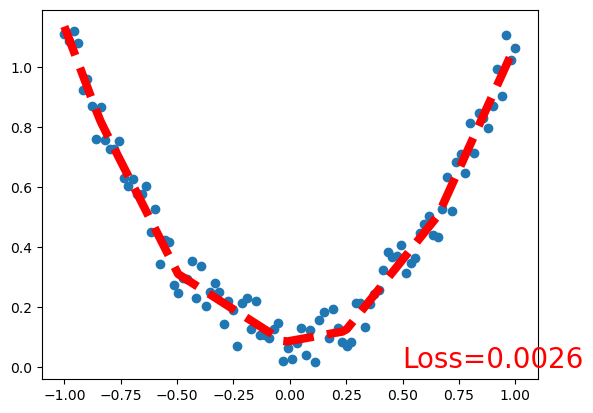

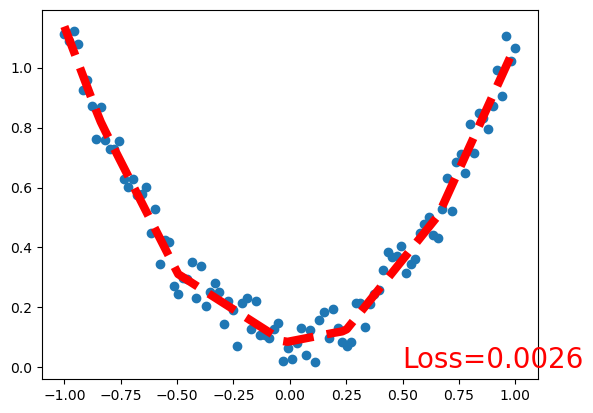

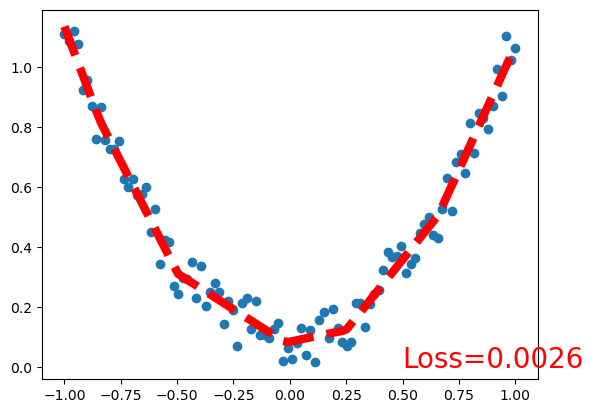

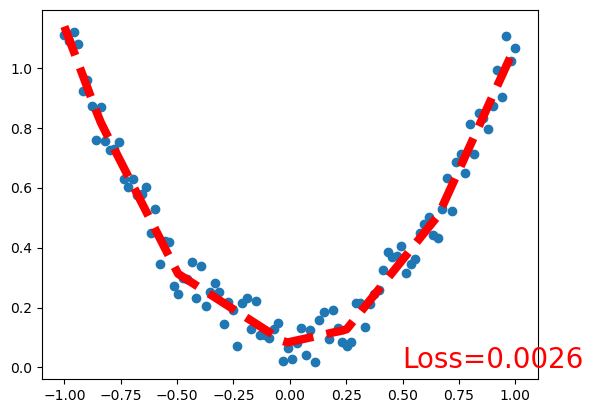

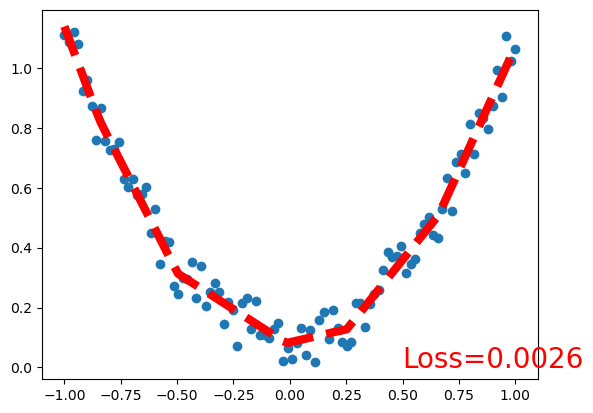

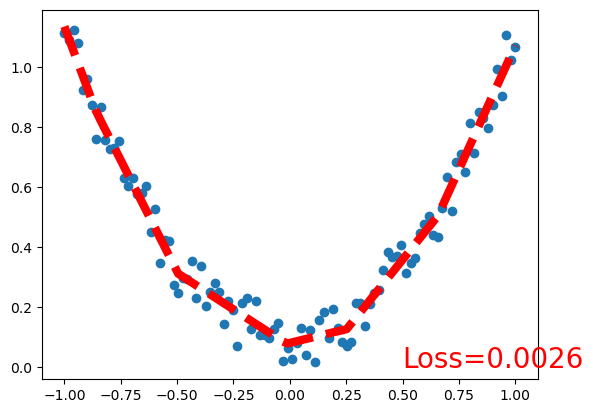

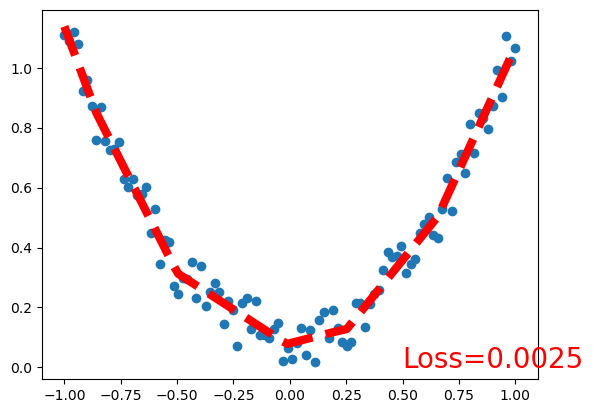

In [19]:
# Train

x.size()

for t in range(200):
    prediction = net(x)
    loss = loss_func(prediction, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if t % 10  == 0:
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r--', lw=6)
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data, fontdict={'size':20, 'color':'red'})
        plt.show()
        plt.pause(0.2)

plt.ioff()